In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
def calculate_user_diffs(original_set: pd.DataFrame, simulated_set: pd.DataFrame) -> list[list]:

    out = []

    # create differences for each user
    for user in range(1, 32):
        original_user_data = original_set[original_set['user'] == user]
        simulated_user_data = simulated_set[simulated_set['user'] == user]

        assert len(original_user_data) == len(simulated_user_data)

        # assert 15 sets
        assert len(original_user_data['set'].unique()) == len(simulated_user_data['set'].unique()) == 15

        diffs = [None] * len(original_user_data)
        assert len(diffs) == len(original_user_data) == len(simulated_user_data)


        for (i , (original, simulated)) in enumerate(zip(original_user_data['timestamp'], simulated_user_data['timestamp'])):
            diff = abs(original - simulated)
            diffs[i] = diff

        assert len(diffs) == len(original_user_data) == len(simulated_user_data)
        assert not any(elem is None for elem in diffs)

        out.append(diffs)

    assert len(out) == 31


    return out

In [3]:
# read in original
original = pd.read_csv('./FreeText-Dataset-31-USERS.csv')

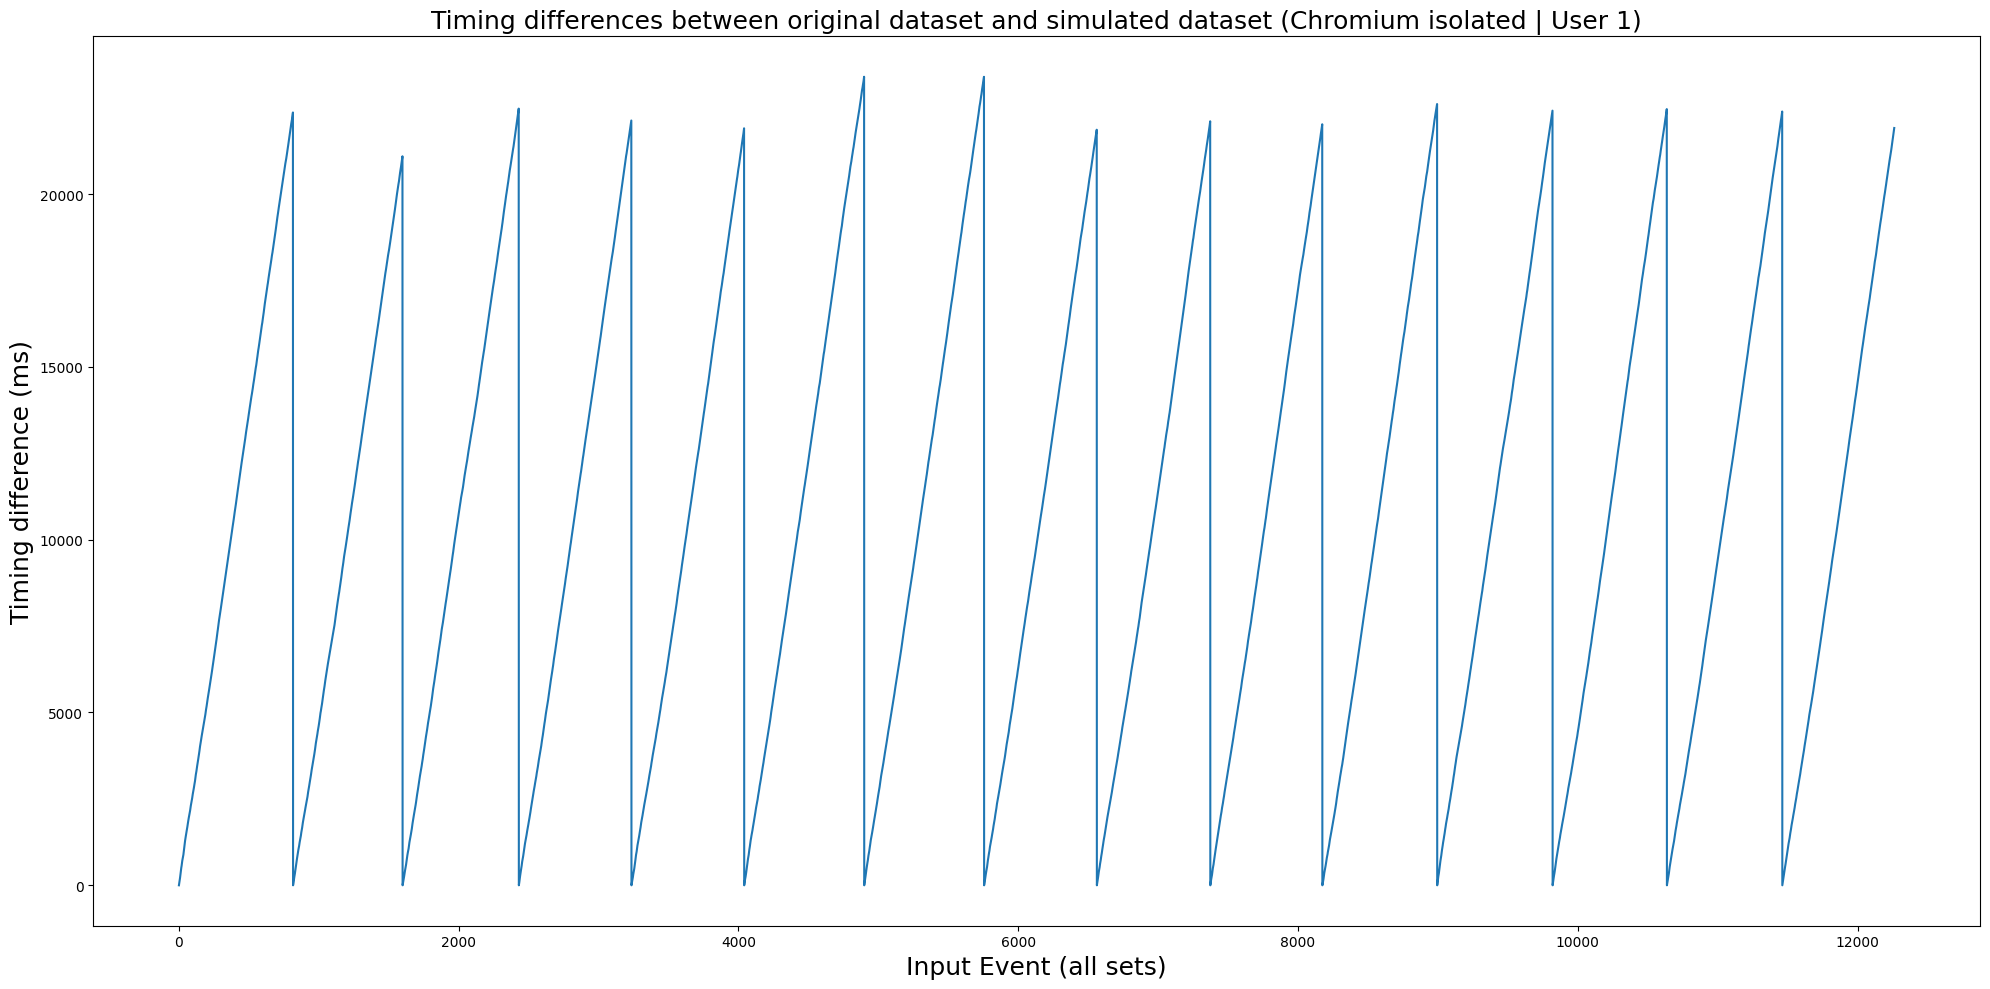

In [5]:
# chromium
chromium_isolated = pd.read_csv('./chromium/isolated/complete.csv')
chromium_unisolated = pd.read_csv('./chromium/unisolated/complete.csv')

chromium_isolated_user_diffs = calculate_user_diffs(original, chromium_isolated)
chromium_unisolated_user_diffs = calculate_user_diffs(original, chromium_unisolated)


user = 1

plt.plot(chromium_isolated_user_diffs[user - 1])
#plt.plot(chromium_unisolated_user_diffs[user - 1], color='red')

plt.title(f'Timing differences between original dataset and simulated dataset (Chromium isolated | User {user})', fontsize=18)
plt.ylabel('Timing difference (ms)', fontsize=18)
plt.xlabel('Input Event (all sets)', fontsize=18)

plt.tight_layout()
plt.savefig(f'./chromium/differences_user{user}.jpeg', bbox_inches="tight", pad_inches=0.3)
plt.show()

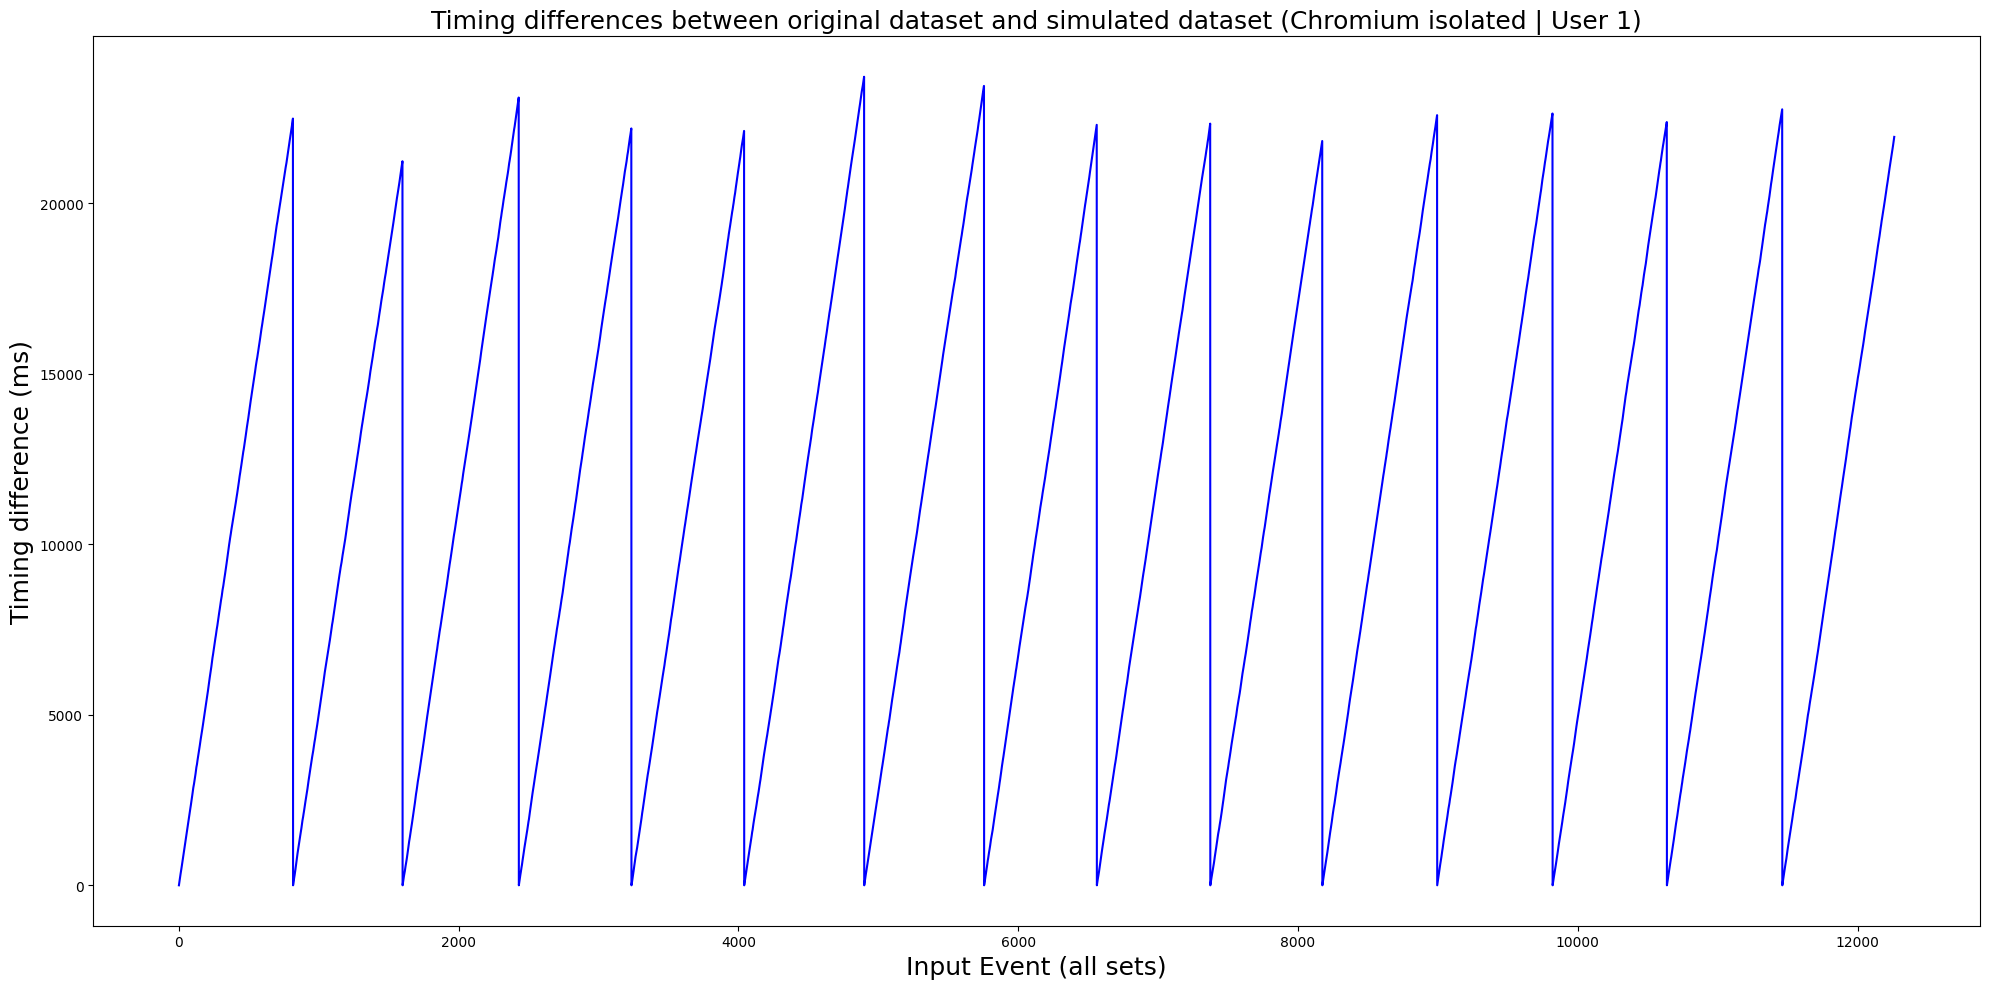

In [19]:
# edge
edge_isolated = pd.read_csv('./edge/isolated/complete.csv')
edge_unisolated = pd.read_csv('./edge/unisolated/complete.csv')

edge_isolated_user_diffs = calculate_user_diffs(original, edge_isolated)
edge_unisolated_user_diffs = calculate_user_diffs(original, edge_unisolated)

user = 1

plt.plot(edge_isolated_user_diffs[user - 1], color='blue')
#plt.plot(edge_unisolated_user_diffs[user - 1], color='red')

plt.title(f'Timing differences between original dataset and simulated dataset (Chromium isolated | User {user})', fontsize=18)
plt.ylabel('Timing difference (ms)', fontsize=18)
plt.xlabel('Input Event (all sets)', fontsize=18)

plt.tight_layout()
plt.savefig(f'./chromium/differences_user{user}.jpeg', bbox_inches="tight", pad_inches=0.3)
plt.show()

In [20]:
# chrome
chrome_isolated = pd.read_csv('./chrome/isolated/complete.csv')
chrome_unisolated = pd.read_csv('./chrome/unisolated/complete.csv')

chrome_isolated_user_diffs = calculate_user_diffs(original, chromium_isolated)
chrome_unisolated_user_diffs = calculate_user_diffs(original, chromium_unisolated)

user = 1

plt.plot(chrome_isolated_user_diffs[user - 1], color='blue')
#plt.plot(chrome_unisolated_user_diffs[user - 1], color='red')

plt.title(f'Timing differences between original dataset and simulated dataset (Chromium isolated | User {user})', fontsize=18)
plt.ylabel('Timing difference (ms)', fontsize=18)
plt.xlabel('Input Event (all sets)', fontsize=18)

plt.tight_layout()
plt.savefig(f'./chromium/differences_user{user}.jpeg', bbox_inches="tight", pad_inches=0.3)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './chrome/isolated/complete.csv'